2105208_MILAN KUMAR SAHOO

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
import seaborn as sns #data visualisation

import warnings
warnings.filterwarnings('ignore')


In [2]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart.csv')

In [3]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [7]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

In [11]:
heart_data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


DATA VISUALISATION

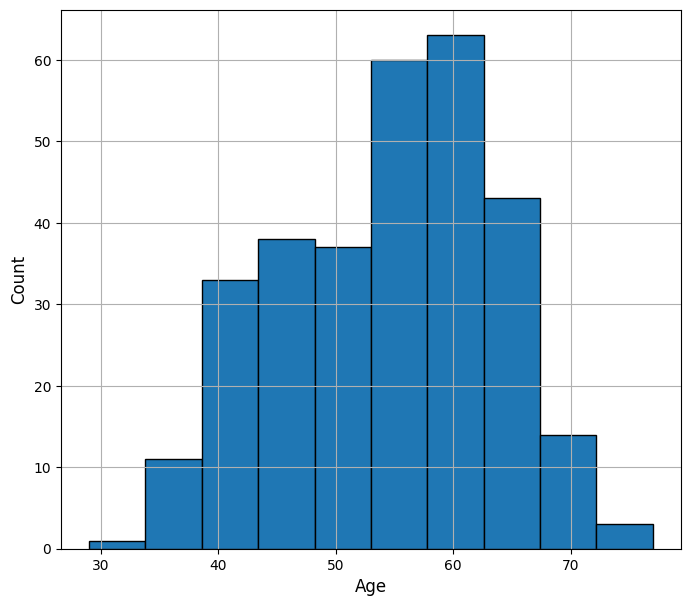

In [12]:
# Plot the histogram of the Age variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
heart_data["age"].hist(edgecolor = "black");

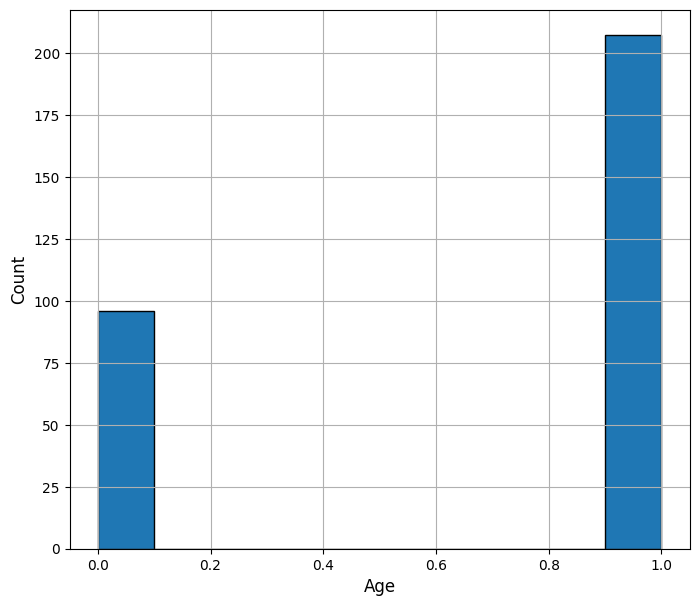

In [13]:
# Plot the histogram of the sex variable
plt.figure(figsize=(8,7))
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
heart_data["sex"].hist(edgecolor = "black");

<Axes: xlabel='target', ylabel='count'>

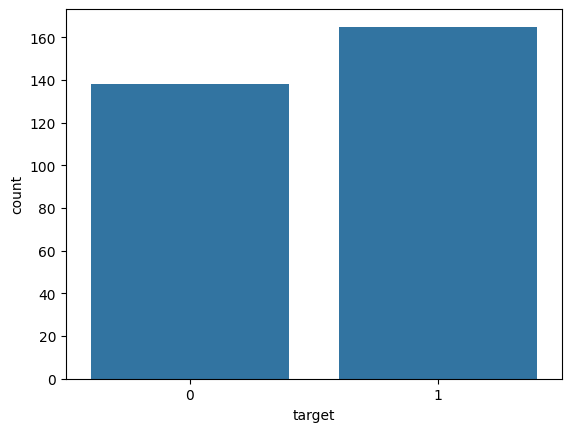

In [14]:
# target countplot
sns.countplot(x = 'target',data = heart_data)

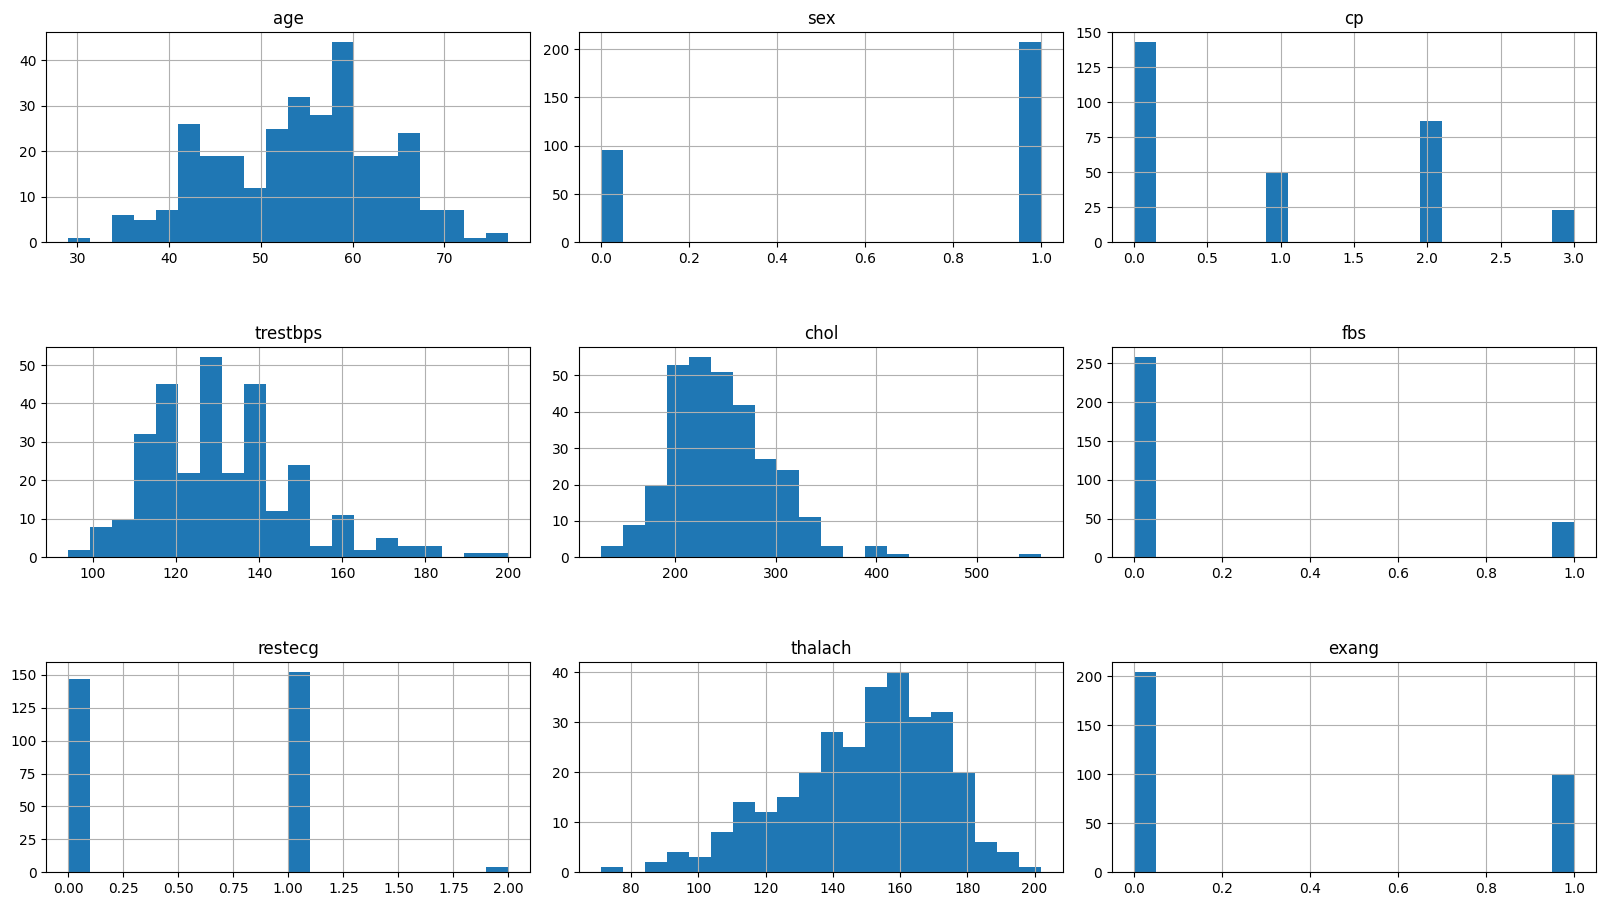

In [15]:
# Histogram of each feature
import itertools

col = heart_data.columns[:9]
plt.subplots(figsize = (20, 15))
length = len(col)

for i, j in itertools.zip_longest(col, range(length)):
    plt.subplot(int((length/2)), 3, j + 1)
    plt.subplots_adjust(wspace = 0.1,hspace = 0.5)
    heart_data[i].hist(bins = 20)
    plt.title(i)
plt.show()

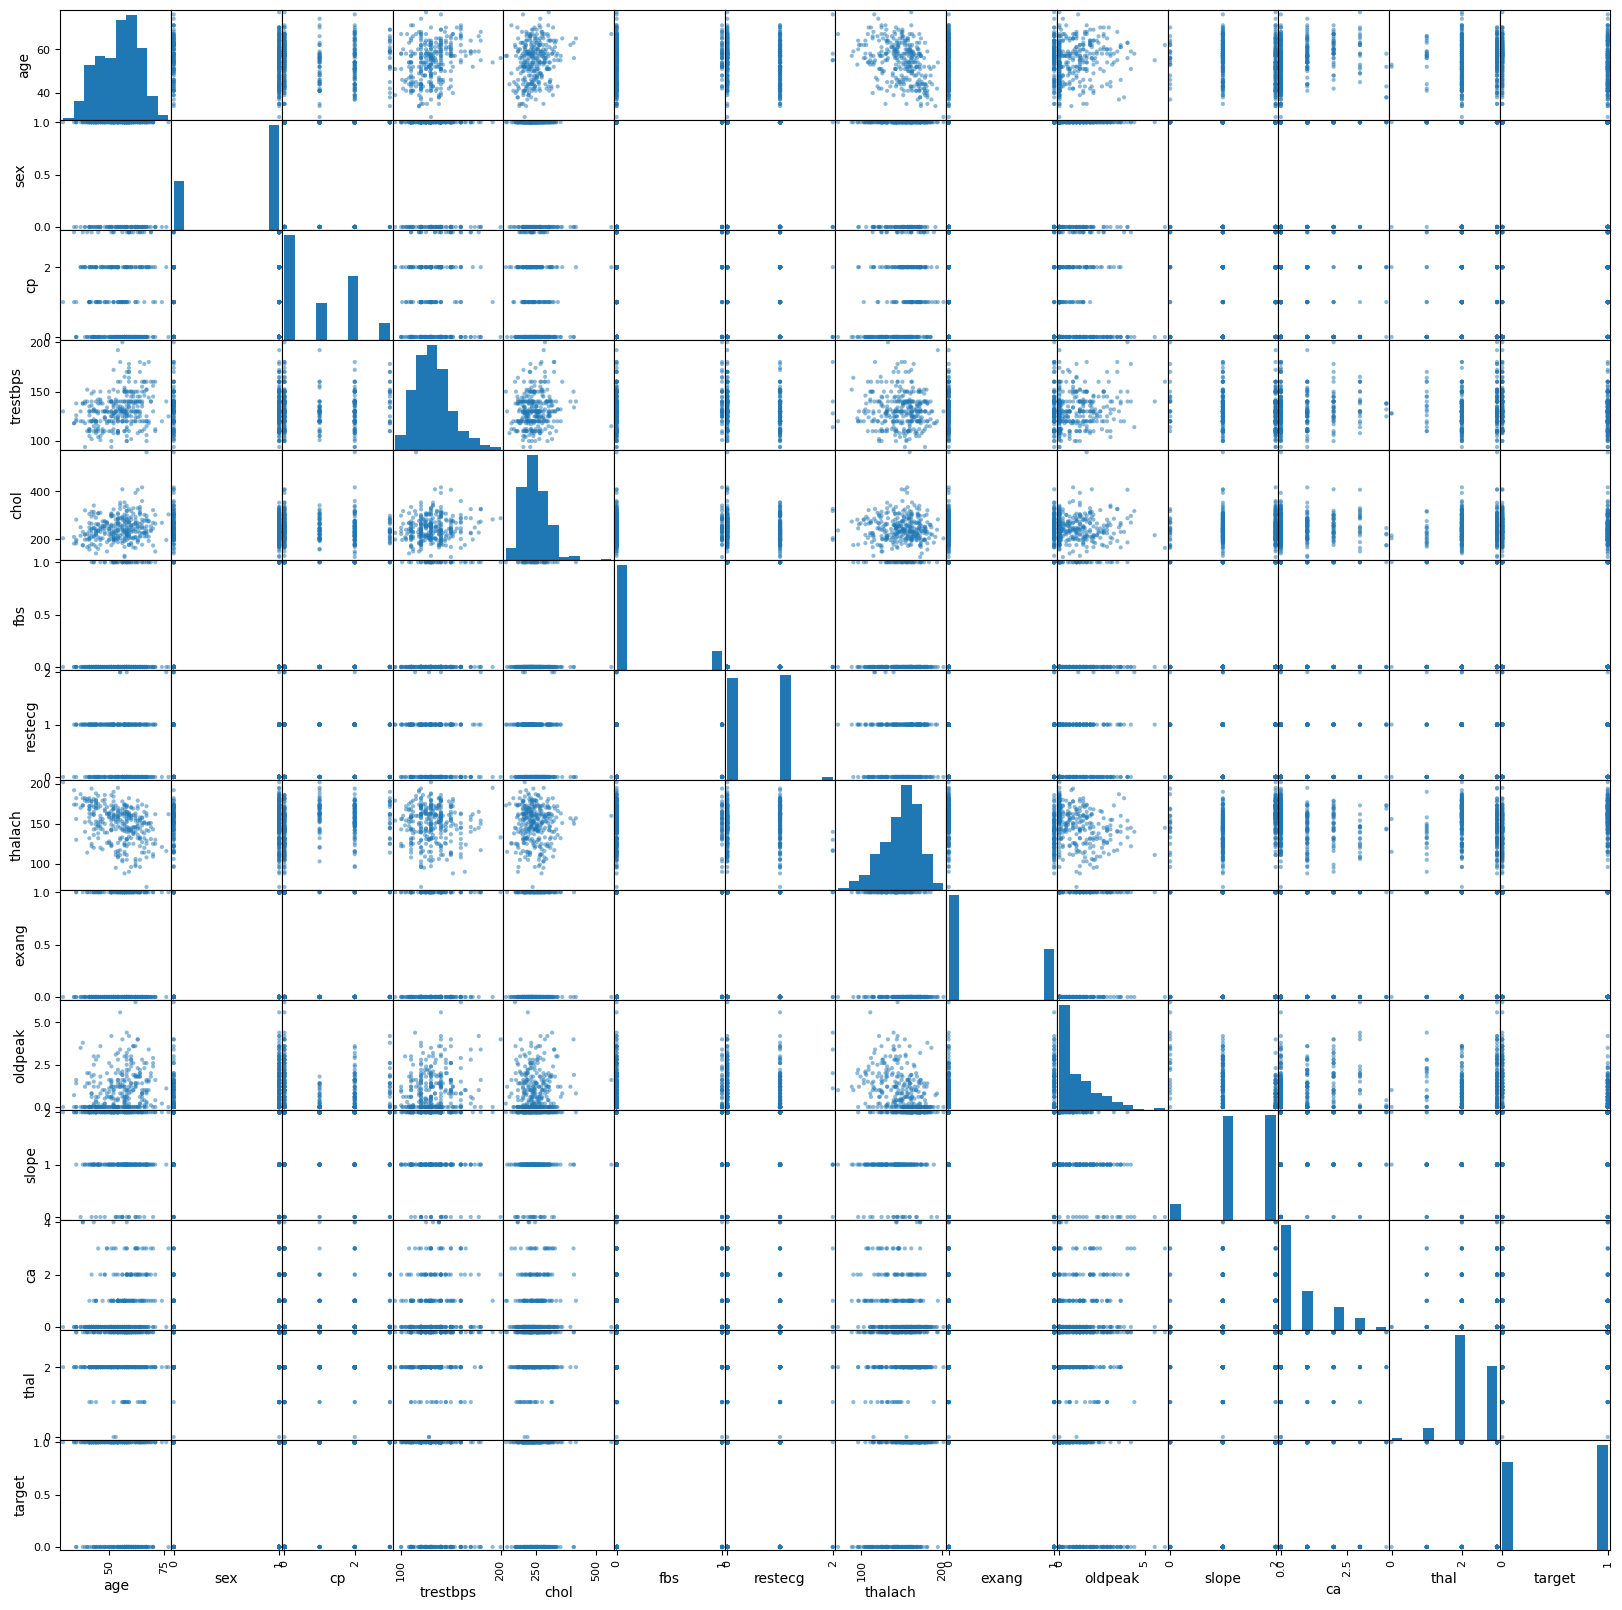

In [16]:
# Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(heart_data, figsize = (20, 20));

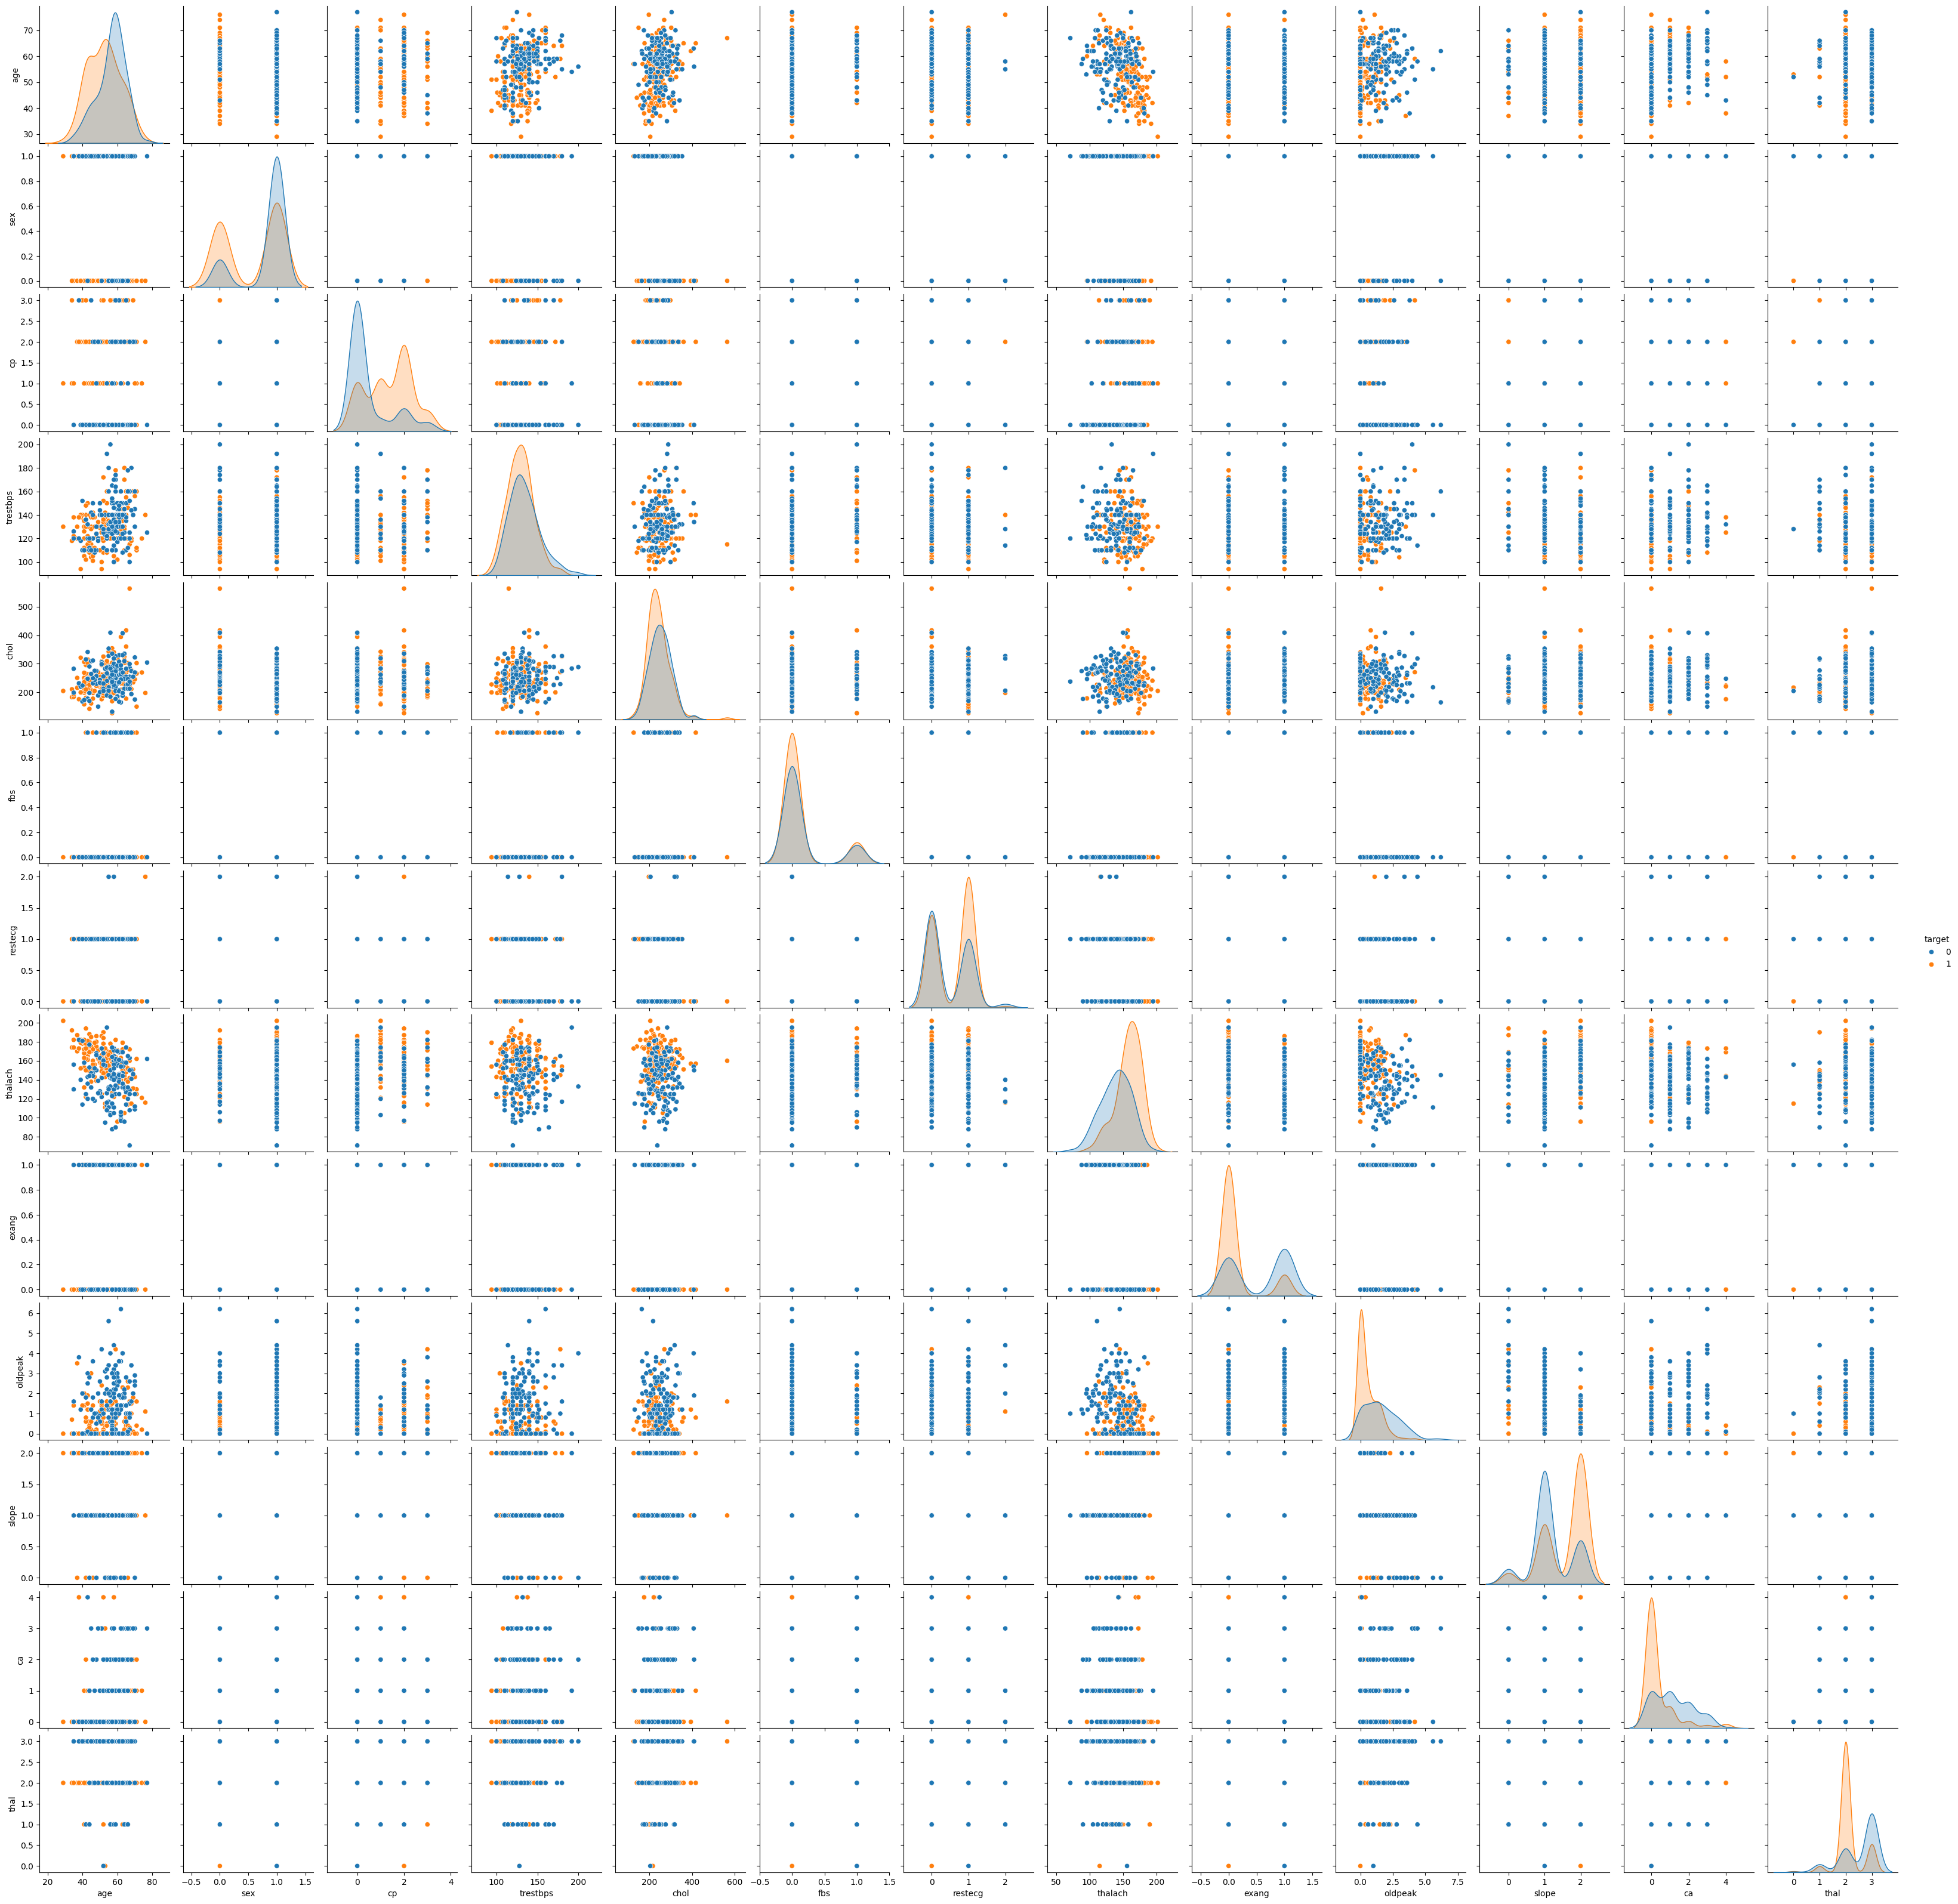

In [17]:
# Pairplot :-enables the visualization of the relationship between each pair of variables in a dataset
sns.pairplot(data = heart_data, hue = 'target')
plt.show()

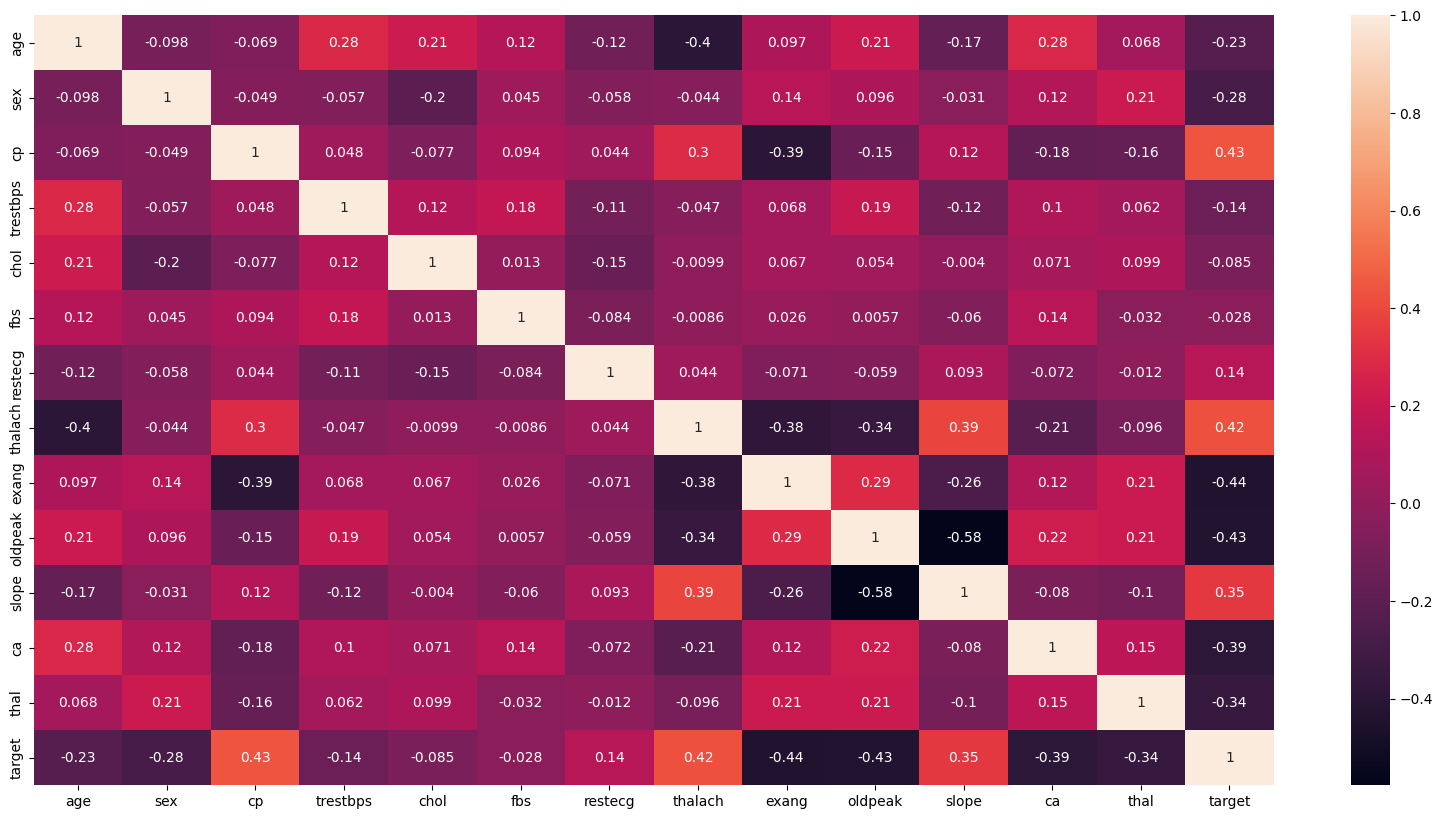

In [18]:
# Heatmap:-a two-dimensional representation of data in which various values are represented by colors.
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(heart_data.corr(), annot = True,ax=ax)
plt.show()

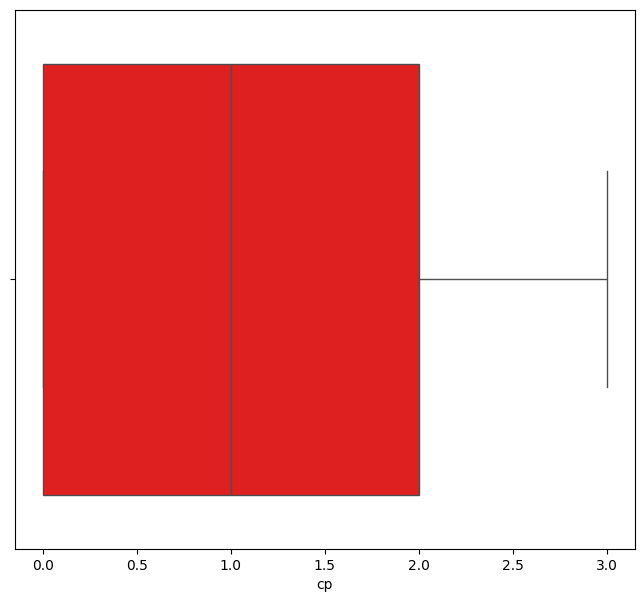

In [19]:
# Outlier observation of cp
import seaborn as sns
plt.figure(figsize=(8,7))
sns.boxplot(x = heart_data["cp"], color="red");

DATA PROECESSING


In [20]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [21]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

Splitting the Data into Training data & Test Data

In [22]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)


In [24]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


### Model Training

### Logistic Regression

In [25]:
model1 = LogisticRegression()

In [26]:
# training the LogisticRegression model with Training data
model1.fit(X_train, Y_train)

LogisticRegression()

In [27]:
# accuracy on training data
X_train_prediction = model1.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [28]:
# accuracy on test data
X_test_prediction = model1.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


In [29]:
# confusion matrix

print(confusion_matrix(Y_test, X_test_prediction))

[[23  5]
 [ 6 27]]


In [30]:
# classification report

print(classification_report(Y_test, X_test_prediction))


              precision    recall  f1-score   support

           0       0.79      0.82      0.81        28
           1       0.84      0.82      0.83        33

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



### KNN classifier

In [31]:
model2 = KNeighborsClassifier()
model2.fit(X_train, Y_train)

KNeighborsClassifier()

In [32]:
# accuracy on training data
Y_pred = model2.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = model2.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))

Accuracy on Training data :  0.78099173553719
Accuracy on Test data :  0.6229508196721312

confusion matrix:
[[16 12]
 [11 22]]

classification report:
              precision    recall  f1-score   support

           0       0.59      0.57      0.58        28
           1       0.65      0.67      0.66        33

    accuracy                           0.62        61
   macro avg       0.62      0.62      0.62        61
weighted avg       0.62      0.62      0.62        61



### SVM

In [33]:
model3 = svm.SVC(kernel='linear')
model3.fit(X_train, Y_train)

SVC(kernel='linear')

In [34]:
# accuracy on training data
Y_pred = model3.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = model3.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))

Accuracy on Training data :  0.8553719008264463
Accuracy on Test data :  0.819672131147541

confusion matrix:
[[21  7]
 [ 4 29]]

classification report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.81      0.88      0.84        33

    accuracy                           0.82        61
   macro avg       0.82      0.81      0.82        61
weighted avg       0.82      0.82      0.82        61



### DESICISION TREE

In [35]:
model4= DecisionTreeClassifier(criterion = 'entropy',random_state=42)
model4.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [36]:
# accuracy on training data
Y_pred = model4.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = model4.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))

Accuracy on Training data :  1.0
Accuracy on Test data :  0.6721311475409836

confusion matrix:
[[20  8]
 [12 21]]

classification report:
              precision    recall  f1-score   support

           0       0.62      0.71      0.67        28
           1       0.72      0.64      0.68        33

    accuracy                           0.67        61
   macro avg       0.67      0.68      0.67        61
weighted avg       0.68      0.67      0.67        61



### RANDOM FOREST

In [37]:
model5 = RandomForestClassifier(criterion = 'entropy', max_depth = 15, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
model5.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, max_features='auto',
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [38]:
# accuracy on training data
Y_pred = model5.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = model5.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))

Accuracy on Training data :  0.9793388429752066
Accuracy on Test data :  0.7704918032786885

confusion matrix:
[[22  6]
 [ 8 25]]

classification report:
              precision    recall  f1-score   support

           0       0.73      0.79      0.76        28
           1       0.81      0.76      0.78        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61



### GAUSSIAN NAIVE BAYES

In [39]:
model6 = GaussianNB()
model6.fit(X_train, Y_train)

GaussianNB()

In [40]:
# accuracy on training data
Y_pred = model6.predict(X_train)
training_data_accuracy = accuracy_score(Y_pred, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)

# accuracy on test data
X_test_prediction = model6.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

# confusion matrix
print('\nconfusion matrix:')
print(confusion_matrix(Y_test, X_test_prediction))

# classification report
print("\nclassification report:")
print(classification_report(Y_test, X_test_prediction))

Accuracy on Training data :  0.8471074380165289
Accuracy on Test data :  0.819672131147541

confusion matrix:
[[25  3]
 [ 8 25]]

classification report:
              precision    recall  f1-score   support

           0       0.76      0.89      0.82        28
           1       0.89      0.76      0.82        33

    accuracy                           0.82        61
   macro avg       0.83      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



### Building a Predictive System

In [41]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model1.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


In [42]:
import pickle

In [43]:
filename = 'heart_disease_model.sav'
pickle.dump(model1, open(filename, 'wb'))

In [44]:

# loading the saved model
loaded_model = pickle.load(open('heart_disease_model.sav', 'rb'))

In [45]:

for column in X.columns:
  print(column)

age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal


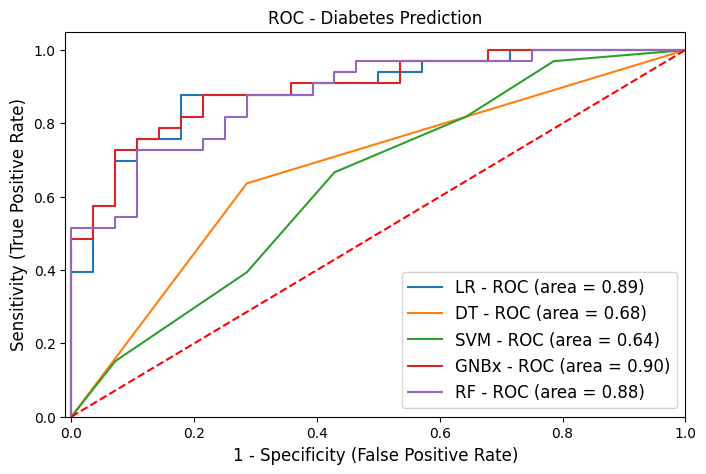

In [46]:
#ROC curve all prediction
# Plotting a graph
''' Multiclass Receiver Operating Characteristic
This example describes the use of the Receiver Operating Characteristic (ROC) metric
to evaluate the quality of multiclass classifiers. ROC curves typically feature
true positive rate (TPR) on the Y axis, and false positive rate (FPR) on the X axis.'''
import os
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))

models = [
    {'label': 'LR', 'model': model1},
    {'label': 'DT', 'model': model4},
    {'label': 'SVM', 'model': model2},
    {'label': 'KNN', 'model': model3},
    {'label': 'GNBx', 'model': model6},
    {'label': 'RF', 'model': model5}
]

for m in models:
    model = m['model']
    model.fit(X_train, Y_train)

    # Check if the model supports probability estimates
    if hasattr(model, 'predict_proba'):
        Y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, thresholds = metrics.roc_curve(Y_test, Y_pred_proba)
        auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
        plt.plot(fpr, tpr, label='%s - ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)

# Create the 'outputs' directory if it does not exist
output_dir = 'outputs'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

plt.savefig(os.path.join(output_dir, 'roc_diabetes.jpeg'), format='jpeg', dpi=400, bbox_inches='tight')
plt.show()